In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Laptop Dataset Analysis
## This is my first attempt on data analysis with Pandas and Matplotlib. Let's do it. 

In [12]:
laptops = pd.read_csv("laptops.csv", index_col=0)

In [13]:
laptops.head()


,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


In [14]:
# Renaming the names of the columns for the consistency. 
laptops.rename(columns = {'title':'Title'}, inplace = True)
laptops.rename(columns = {'price':'Price'}, inplace = True)
laptops.rename(columns = {'In_build_sw':'InBuild_Software'}, inplace = True)
laptops.rename(columns = {'warranty':'Warranty'}, inplace = True)
# Checking the number of rows and columns in the dataset
laptops.shape

(920, 10)

In [15]:
# Checking how many columns have null values in them
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             920 non-null    object
 1   Price             920 non-null    object
 2   discount          831 non-null    object
 3   Processor         920 non-null    object
 4   RAM               920 non-null    object
 5   OS                920 non-null    object
 6   SSD               920 non-null    object
 7   Display           920 non-null    object
 8   InBuild_Software  357 non-null    object
 9   Warranty          906 non-null    object
dtypes: object(10)
memory usage: 79.1+ KB


## Tackling the Null and unwanted values in the Dataset

In [17]:
# Dropping the column since it has weird values. 
laptops = laptops.drop(['discount'], axis = 1)

In [18]:
# Categorising the column 'In_build_sw' in two ways, whether the laptop has any software or not.
laptops.InBuild_Software = laptops.InBuild_Software.fillna('No')
laptops.InBuild_Software = np.where(laptops.InBuild_Software == 'No', 'No', 'Yes')

In [19]:
laptops

,Title,Price,Processor,RAM,OS,SSD,Display,InBuild_Software,Warranty
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,8 GB DDR4 RAM
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,No,1 Year Onsite Warranty
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1 Year Onsite Warranty
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1 Year Onsite Warranty
...,...,...,...,...,...,...,...,...,...
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,"₹1,19,990",Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,No,3 Years Onsite Warranty + 3 Year Premium Care ...
916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,"₹68,990",Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,No,Intel Core i5 Processor (11th Gen)
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,"₹35,990",Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1 Year Onsite Warranty
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,"₹36,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1 Year Onsite Warranty


In [20]:
# Checking the values in the column 'warranty'
laptops.Warranty.unique()

array(['8 GB DDR4 RAM', '1 Year Onsite Warranty',
       '1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On',
       '1 Year onsite warranty', '2 Years Onsite�Warranty',
       '1 Year International Travelers Warranty (ITW)',
       '1 Year Limited Warra\xadnty',
       'Intel Core i3 Processor (11th Gen)', '16 GB DDR4 RAM',
       '1 Year Onsite Warranty + 1 Year Premium Care + 1 Year Accidentaly Damage Protection',
       '2 Year Onsite�Warranty',
       '1 Year Onsite�Warranty�+ 1 Year Premium Care + 1 Year Accidental Damage Protection',
       '1 Year Warranty', '2 Year Carry-In Warranty Term',
       '1 Year Carry-in Warranty',
       '1 Year International Travelers Warranty',
       '1 Year Limited Warranty', '1 Year Onsite Hardware Service',
       '1 Year Manufacturer', '2 Year Onsite Warranty', nan,
       '2 Year On-Site & Carry-In Warranty',
       '1 Year On-Site & Carry-In Warranty', '1 Year Onsite warranty',
       '720p HD webcam with physical privacy s

In [21]:
# Getting the years of warranty
# Removed the values which did not have any year specified in it
# filtered out the years for the rest of values.
laptops.Warranty = np.where(laptops.Warranty.str.contains('Year') == False, 'No',laptops.Warranty.str.split(' ').str[0])
laptops.Warranty = np.where(~laptops.Warranty.isin(['1','2','3']), 'No',laptops.Warranty.str.split(' ').str[0])
laptops.Warranty = pd.to_numeric(laptops.Warranty, errors='coerce')

# Filled the NaN values 
laptops.Warranty = laptops.Warranty.fillna('No')
laptops.Warranty.unique()

array(['No', 1.0, 2.0, 3.0], dtype=object)

In [22]:
laptops


,Title,Price,Processor,RAM,OS,SSD,Display,InBuild_Software,Warranty
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,No
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,No,1.0
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1.0
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1.0
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0
...,...,...,...,...,...,...,...,...,...
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,"₹1,19,990",Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,No,3.0
916,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,"₹68,990",Processor: i5-11260H (Base: 2.60 GHz up to 4.4...,RAM & Storage: 16GB DDR4 (2 DIMM Slots) 512GB SSD,Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...,"Display: 15.6"" FHD WVA AG 250 nits 120Hz Narro...",Ports: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0...,No,No
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,"₹35,990",Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,"₹36,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0


In [23]:
# Checking to see if there any null values left
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             920 non-null    object
 1   Price             920 non-null    object
 2   Processor         920 non-null    object
 3   RAM               920 non-null    object
 4   OS                920 non-null    object
 5   SSD               920 non-null    object
 6   Display           920 non-null    object
 7   InBuild_Software  920 non-null    object
 8   Warranty          920 non-null    object
dtypes: object(9)
memory usage: 104.2+ KB


## Modelling the data for feature extraction

In [24]:
# Transforming the price
# Removing the comma in between and removing the currency symbol
laptops.Price = laptops.Price.str.replace('₹', '')
laptops.Price = laptops.Price.str.replace(',','')
laptops.Price = pd.to_numeric(laptops.Price, errors='coerce')
laptops.Price

0       37990
1       35490
2       33999
3       45490
4       33990
        ...  
915    119990
916     68990
917     35990
918     36990
919     89999
Name: Price, Length: 920, dtype: int64

In [25]:
# Extracting the brands of the laptops from the title
laptops['Laptop_Brands'] = laptops.Title.str.split(' ').str[0]
laptops['Laptop_Brands'].value_counts()

ASUS         263
HP           165
DELL         162
Lenovo       108
acer          62
MSI           50
APPLE         44
Infinix       31
SAMSUNG        8
GIGABYTE       7
realme         4
ALIENWARE      4
Avita          4
RedmiBook      2
LG             2
Nokia          1
Vaio           1
Mi             1
Ultimus        1
Name: Laptop_Brands, dtype: int64

In [26]:
# Checking the different processors
laptops.Processor.unique()

array(['Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores',
       'Intel Core i3 Processor (11th Gen)',
       'Intel Core i3 Processor (12th Gen)',
       'Intel Core i3 Processor (10th Gen)',
       'AMD Ryzen 7 Octa Core Processor',
       'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor (12th Gen)',
       'AMD Ryzen 3 Dual Core Processor',
       'Intel Core i5 Processor (11th Gen)',
       'Intel Celeron Dual Core Processor',
       'Intel Celeron Quad Core Processor',
       'AMD Athlon Dual Core Processor',
       'AMD Ryzen 5 Quad Core Processor', 'Apple M1 Processor',
       'Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 Cores',
       'Processor: Intel i5-1235U (Base- 3.30 GHz & Turbo up to 4.40 GHz) 10 Cores',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i7 Processor (11th Gen)',
       'AMD Ryzen 3 Quad Core Processor',
       'Qualcomm Snapdragon 7c Gen 2 Processor', 'Apple M2 Processor',

In [27]:
# Replacing 'Processor: ' in the beginning of some of the values
laptops.Processor = laptops.Processor.str.replace('Processor: ', '')

In [28]:
# Extracting the processor brands
laptops['Processor_Brands'] = laptops.Processor.str.split(' ').str[0]
laptops['Processor_Brands'].value_counts()
laptops.shape

(920, 11)

In [29]:
# Filtering out the major Processor Brands and dropping other records
laptops = laptops[laptops['Processor_Brands'].isin(['Intel','AMD','Apple','NVIDIA'])]
laptops.shape

(888, 11)

In [30]:
#Checking the type of processors from different brands to formulate the code for series and gen extaction.
laptops.Processor.value_counts()
apple = laptops.loc[laptops['Processor_Brands'].isin(['Apple'])]
intel = laptops.loc[laptops['Processor_Brands'].isin(['Intel'])]
nvidia = laptops.loc[laptops['Processor_Brands'].isin(['NVIDIA'])]
amd = laptops.loc[laptops['Processor_Brands'].isin(['AMD'])]
#apple['Processor'].value_counts()
#intel['Processor'].value_counts()
#nvidia['Processor'].value_counts()
#amd['Processor'].value_counts()

In [31]:
# Extracting the Processor Series and Generation from the Processors

# Intel Processor 
laptops_copied = laptops.copy()
laptops = laptops.assign(Processor_Series = laptops_copied.Processor.str.split(' ').str[2])
laptops.loc[(laptops.Processor_Brands == 'Intel') & ~(laptops.Processor_Series.isin(['i3','i5','i7','i9'])),['Processor_Series']] = 'Not specified'
# Intel Generation
laptops = laptops.assign(Processor_Gen = laptops_copied.Processor.str.split('(').str[1].str.replace(')','',regex=True))
laptops.loc[(laptops.Processor_Brands == 'Intel') & ~(laptops.Processor_Gen.isin(['3rd Gen', '4th Gen', '5th Gen', '7th Gen', '8th Gen', '9th Gen', '10th Gen', '11th Gen', '12th Gen'])),['Processor_Gen']] = 'Not specified'

#AMD Processor
laptops.loc[(laptops.Processor_Brands == 'AMD') & ~(laptops.Processor_Series.isin(['3','5','7','9'])),['Processor_Series']] = 'Not specified'
# AMD Generation
laptops.loc[(laptops.Processor_Brands == 'AMD') & ~(laptops.Processor_Gen.isin(['3rd Gen', '4th Gen', '5th Gen', '7th Gen', '9th Gen', '10th Gen', '11th Gen'])),['Processor_Gen']] = 'Not specified'

# Apple Processors
laptops.loc[(laptops.Processor_Brands == 'Apple'),['Processor_Series']] = laptops.Processor.str.split(' ').str[1]
laptops.loc[(laptops.Processor_Brands == 'Apple'),['Processor_Gen']] = 'Not specified'

# NVIDIA Processors
laptops.loc[(laptops.Processor_Brands == 'NVIDIA'),['Processor_Series']] = 'Not specified'
laptops.loc[(laptops.Processor_Brands == 'NVIDIA'),['Processor_Gen']] = 'Not specified'

laptops.head()

,Title,Price,Processor,RAM,OS,SSD,Display,InBuild_Software,Warranty,Laptop_Brands,Processor_Brands,Processor_Series,Processor_Gen
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990,Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,No,DELL,Intel,Not specified,Not specified
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,No,1.0,HP,Intel,i3,11th Gen
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1.0,Lenovo,Intel,i3,11th Gen
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1.0,HP,Intel,i3,12th Gen
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,10th Gen


In [32]:
# Removing the 'RAM & Storage: ' in the beginning of some values and adding appropriate spaces
laptops.loc[(laptops.RAM.str.contains('RAM & Storage: ')),'RAM'] = laptops.RAM.str.replace('GB', ' GB')
laptops.RAM = laptops.RAM.str.replace('RAM & Storage: ', '')

# Extracting the RAM Size
laptops_copied = laptops.copy()
laptops = laptops.assign(RAM_Size = laptops_copied.RAM.str.split(' ').str[0])
laptops.loc[~(laptops.RAM_Size.isin(['4','8','16','32'])),['RAM_Size']] = 'Not specified'
laptops.RAM_Size = pd.to_numeric(laptops.RAM_Size, errors='coerce')

# Extracting the type of RAM
laptops = laptops.assign(RAM_Type = laptops_copied.RAM.str.split(' ').str[2])
laptops.loc[~(laptops.RAM_Type.isin(['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X', 'LPDDR5'])),['RAM_Type']] = 'Not specified'

laptops

,Title,Price,Processor,RAM,OS,SSD,Display,InBuild_Software,Warranty,Laptop_Brands,Processor_Brands,Processor_Series,Processor_Gen,RAM_Size,RAM_Type
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990,Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,8 GB DDR4 & 1TB HDD + 256 GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,No,DELL,Intel,Not specified,Not specified,8.0,DDR4
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,No,1.0,HP,Intel,i3,11th Gen,8.0,DDR4
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1.0,Lenovo,Intel,i3,11th Gen,8.0,DDR4
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1.0,HP,Intel,i3,12th Gen,8.0,DDR4
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,10th Gen,8.0,DDR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,HP Envy 13 Ryzen 5 Quad Core 3500U - (8 GB/512...,87900,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,Yes,1.0,HP,AMD,5,Not specified,8.0,DDR4
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990,Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,No,3.0,Lenovo,Intel,i7,12th Gen,16.0,LPDDR5
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,DELL,Intel,Not specified,Not specified,8.0,DDR4
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,11th Gen,8.0,DDR4


In [33]:
# Checking values in the OS
laptops.OS.value_counts()

64 bit Windows 11 Operating System                                                                         436
64 bit Windows 10 Operating System                                                                         191
Windows 11 Operating System                                                                                135
Mac OS Operating System                                                                                     44
Windows 10 Operating System                                                                                 21
DOS Operating System                                                                                         8
Chrome Operating System                                                                                      7
Improved thermal design with copper pipes & vents                                                            6
64 bit Chrome Operating System                                                                               6
S

In [34]:
# Updating the OS with more suitable values. 
options = {'64 bit Windows 11 Operating System' : 'Windows 11', 
'64 bit Windows 10 Operating System' : 'Windows 10', 
'Windows 11 Operating System' : 'Windows 11', 
'Mac OS Operating System' : 'Mac OS', 
'Windows 10 Operating System' : 'Windows 10', 
'DOS Operating System' : 'DOS', 
'Chrome Operating System' : 'Chrome', 
'64 bit Chrome Operating System' : 'Chrome', 
'32 bit Windows 11 Operating System' : 'Windows 11', 
'64 bit Windows 8 Operating System' : 'Windows 8'}

laptops = laptops.replace({'OS': options})
laptops.loc[~(laptops.OS.isin(['Windows 8', 'Windows 10', 'Windows 11', 'Mac OS', 'DOS', 'Chrome'])),['OS']] = 'Other'

laptops

,Title,Price,Processor,RAM,OS,SSD,Display,InBuild_Software,Warranty,Laptop_Brands,Processor_Brands,Processor_Series,Processor_Gen,RAM_Size,RAM_Type
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990,Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,8 GB DDR4 & 1TB HDD + 256 GB SSD,Other,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,No,DELL,Intel,Not specified,Not specified,8.0,DDR4
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11,256 GB SSD,35.56 cm (14 inch) Display,No,1.0,HP,Intel,i3,11th Gen,8.0,DDR4
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1.0,Lenovo,Intel,i3,11th Gen,8.0,DDR4
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1.0,HP,Intel,i3,12th Gen,8.0,DDR4
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 11,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,10th Gen,8.0,DDR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,HP Envy 13 Ryzen 5 Quad Core 3500U - (8 GB/512...,87900,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,Windows 10,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,Yes,1.0,HP,AMD,5,Not specified,8.0,DDR4
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990,Intel Core i7 Processor (12th Gen),16 GB LPDDR5 RAM,Windows 11,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,No,3.0,Lenovo,Intel,i7,12th Gen,16.0,LPDDR5
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,Windows 11,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,DELL,Intel,Not specified,Not specified,8.0,DDR4
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 10,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,11th Gen,8.0,DDR4


In [35]:
# Dropping column RAM and Processor as we have already extracted necessary information
laptops = laptops.drop(['RAM'], axis=1)
laptops = laptops.drop(['Processor'], axis=1)
laptops

,Title,Price,OS,SSD,Display,InBuild_Software,Warranty,Laptop_Brands,Processor_Brands,Processor_Series,Processor_Gen,RAM_Size,RAM_Type
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990,Other,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),No,No,DELL,Intel,Not specified,Not specified,8.0,DDR4
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490,Windows 11,256 GB SSD,35.56 cm (14 inch) Display,No,1.0,HP,Intel,i3,11th Gen,8.0,DDR4
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1.0,Lenovo,Intel,i3,11th Gen,8.0,DDR4
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,Yes,1.0,HP,Intel,i3,12th Gen,8.0,DDR4
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,Windows 11,512 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,10th Gen,8.0,DDR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,HP Envy 13 Ryzen 5 Quad Core 3500U - (8 GB/512...,87900,Windows 10,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,Yes,1.0,HP,AMD,5,Not specified,8.0,DDR4
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990,Windows 11,512 GB SSD,35.56 cm (14 Inch) Touchscreen Display,No,3.0,Lenovo,Intel,i7,12th Gen,16.0,LPDDR5
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990,Windows 11,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,DELL,Intel,Not specified,Not specified,8.0,DDR4
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990,Windows 10,256 GB SSD,39.62 cm (15.6 inch) Display,Yes,1.0,ASUS,Intel,i3,11th Gen,8.0,DDR4


In [36]:
# Removing all the values which do not have HDD or SSD
laptops.loc[~(laptops.SSD.str.contains('HDD|SSD')),'SSD'] = 'Not specified'

# Creating a new column which contains the size of HDD in the laptops
laptops['HDD_Size'] = np.where(laptops.SSD.str.contains('HDD'), laptops.SSD.str.split('HDD').str[0], 0)

hdd_options = {'1 TB ': 1, 
              '256 GB ': 0.25, 
              '512 GB ': 0.5, 
              '2 TB ': 2}
laptops = laptops.replace({'HDD_Size': hdd_options})

# Removing '|' from the values
laptops.SSD = laptops.SSD.str.replace('|','', regex = True)

# Creating a new column which contains the size of SSD in the laptops
laptops['SSD_Size'] = np.where(laptops.SSD.str.contains('SSD'), laptops.SSD.str.split('SSD').str[0], 0)

# Removing the HDD values from the SSD column
laptops.SSD_Size = laptops.SSD_Size.str.replace('.*HDD', '', regex = True)

ssd_options = {'1 TB ': 1, 
              '256 GB ': 0.25, 
              '512 GB ': 0.5, 
              '2 TB ': 2,
              '4 TB ': 4,
              '128 GB ': 0.125}
laptops = laptops.replace({'SSD_Size': ssd_options})

# Labelling the values as not specified in SSD and HDD where it is not given
laptops.loc[laptops.SSD == "Not specified", 'SSD_Size'] = 'Not specified'
laptops.loc[laptops.SSD == "Not specified", 'HDD_Size'] = 'Not specified'

# Filling the NaN values in SSD_Size with 0, where laptop only has HDD specified.
laptops.loc[~laptops.SSD.str.contains('SSD') & (laptops.SSD != 'Not specified'),]
laptops.SSD_Size = laptops.SSD_Size.fillna(0)

#dropping the column 'SSD', since we have already taken out the necessary information. 
laptops = laptops.drop(['SSD'], axis=1)
laptops.SSD_Size.unique()

array(['Not specified', 0.25, 0.5, 0.125, 0, 1.0, 2.0, 4.0], dtype=object)

In [37]:
# Removing all the values which do not have any size in it. 
laptops.loc[~laptops.Display.str.contains('inch'),'Display'] = 'Not specified'

# Extrcating the inches from the display size
laptops.Display = laptops.Display.str.split('(').str[1]
laptops.Display = laptops.Display.str.replace(' inch.*', '', regex = True)

#Filling NaN values with 'Not specified'
laptops.Display = laptops.Display.fillna('Not specified')

laptops.Display.unique()

array(['Not specified', '14', '15.6', '13.3', '17.3', '16', '16.2', '15',
       '14.1', '16.1', '14.2', '13.4', '14.5', '13.5', '13', '12'],
      dtype=object)

In [38]:
# Done with extracting all the information. 
# I hope so. Let's see how the data looks now. 
laptops

,Title,Price,OS,Display,InBuild_Software,Warranty,Laptop_Brands,Processor_Brands,Processor_Series,Processor_Gen,RAM_Size,RAM_Type,HDD_Size,SSD_Size
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990,Other,Not specified,No,No,DELL,Intel,Not specified,Not specified,8.0,DDR4,Not specified,Not specified
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490,Windows 11,14,No,1.0,HP,Intel,i3,11th Gen,8.0,DDR4,0.0,0.25
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999,Windows 11,Not specified,No,1.0,Lenovo,Intel,i3,11th Gen,8.0,DDR4,0.0,0.5
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490,Windows 11,Not specified,Yes,1.0,HP,Intel,i3,12th Gen,8.0,DDR4,0.0,0.5
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,Windows 11,15.6,Yes,1.0,ASUS,Intel,i3,10th Gen,8.0,DDR4,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,HP Envy 13 Ryzen 5 Quad Core 3500U - (8 GB/512...,87900,Windows 10,13.3,Yes,1.0,HP,AMD,5,Not specified,8.0,DDR4,0.0,0.5
915,Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...,119990,Windows 11,Not specified,No,3.0,Lenovo,Intel,i7,12th Gen,16.0,LPDDR5,0.0,0.5
917,DELL Inspiron Pentium Quad Core - (8 GB/256 GB...,35990,Windows 11,15.6,Yes,1.0,DELL,Intel,Not specified,Not specified,8.0,DDR4,0.0,0.25
918,ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...,36990,Windows 10,15.6,Yes,1.0,ASUS,Intel,i3,11th Gen,8.0,DDR4,0.0,0.25


# Let's start with the visualization
## We have done good so far and intend to keep it so. 

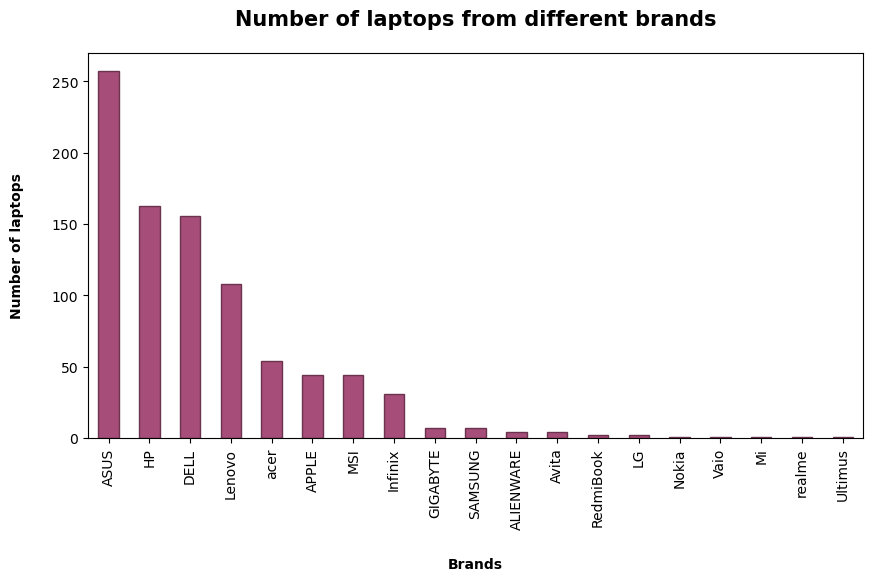

In [42]:
# Creating a graph to know how many of the laptops are from different brands

laptops.Laptop_Brands.value_counts().plot(kind='bar', figsize = (10,5), color='#a64d79', edgecolor='#6b334e')
plt.xlabel('Brands', fontweight='bold', labelpad = 20)
plt.ylabel('Number of laptops', fontweight='bold', labelpad = 20)
plt.title('Number of laptops from different brands', fontweight='bold', fontsize= 15, pad = 20)
plt.show()

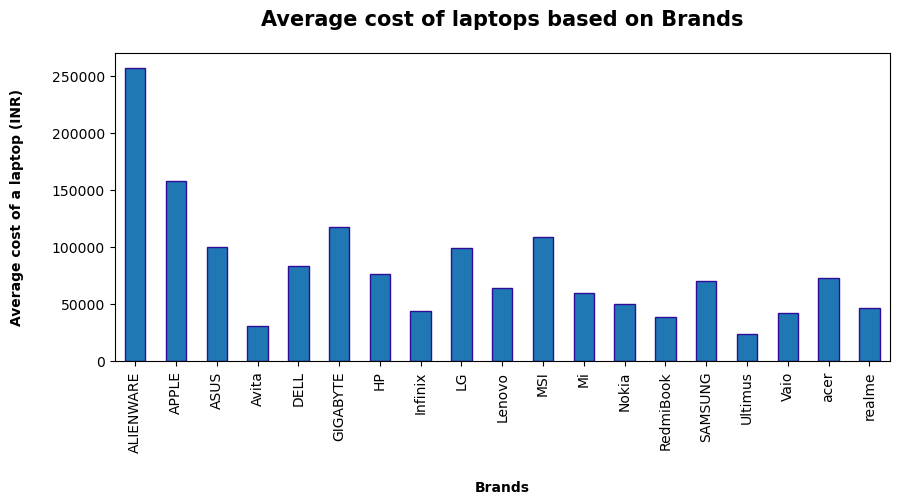

In [43]:
# Creating a figure to map the average cost of laptops from their respective brands.

mean_value_brands = laptops.groupby('Laptop_Brands')['Price'].mean()
mean_value_brands.plot(kind='bar', figsize=(10,4), edgecolor='#2f0d99')
plt.xlabel('Brands', fontweight='bold', labelpad = 20)
plt.ylabel('Average cost of a laptop (INR)', fontweight='bold', labelpad = 20)
plt.title('Average cost of laptops based on Brands', fontweight='bold', fontsize= 15, pad = 20)
plt.show()

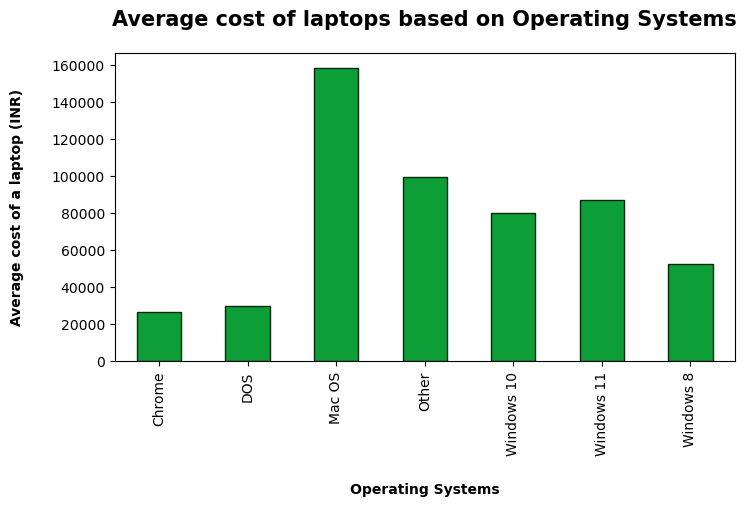

In [44]:
# Creating a figure to map the average cost of laptops from their respective Operating Systems.

mean_value_brands = laptops.groupby('OS')['Price'].mean()
mean_value_brands.plot(kind='bar', figsize=(8,4), color = '#0d9e38', edgecolor='#02290e')
plt.xlabel('Operating Systems', fontweight='bold', labelpad = 20)
plt.ylabel('Average cost of a laptop (INR)', fontweight='bold', labelpad = 20)
plt.title('Average cost of laptops based on Operating Systems', fontweight='bold', fontsize= 15, pad = 20)
plt.show()

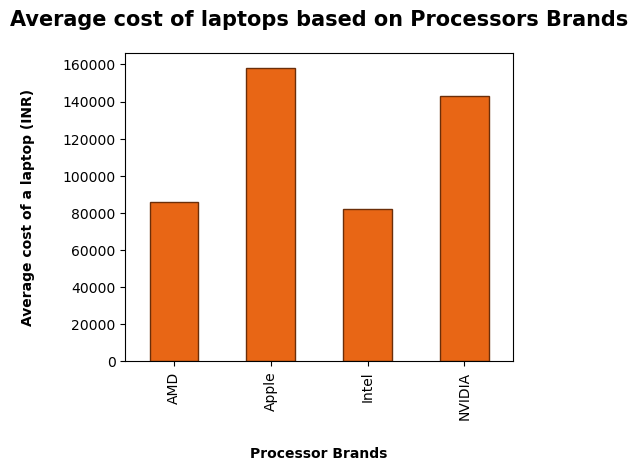

In [45]:
# Creating a figure to map the average cost of laptops from their respective processors.

mean_value_brands = laptops.groupby('Processor_Brands')['Price'].mean()
mean_value_brands.plot(kind='bar', figsize=(5,4), color = '#e86615', edgecolor='#6b2e09')
plt.xlabel('Processor Brands', fontweight='bold', labelpad = 20)
plt.ylabel('Average cost of a laptop (INR)', fontweight='bold', labelpad = 20)
plt.title('Average cost of laptops based on Processors Brands', fontweight='bold', fontsize= 15, pad = 20)
plt.show()

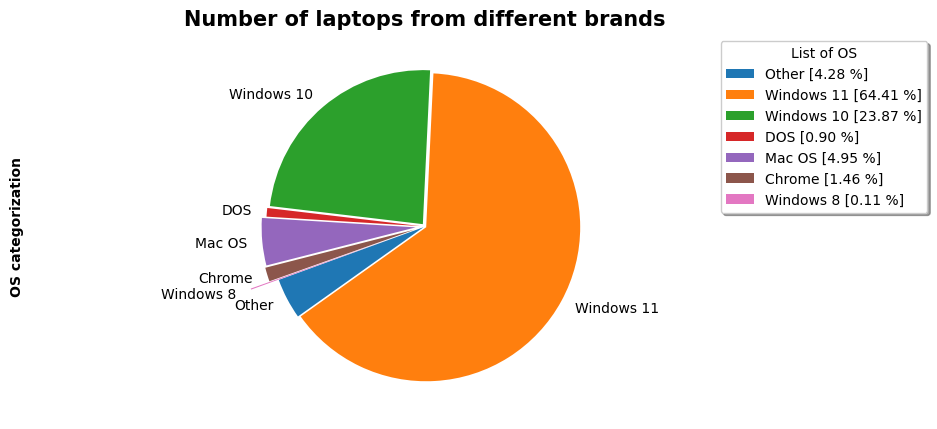

In [46]:
# Creating the plots for the share of laptops in data having different types of Opearting systems.

myexplode = [0.01, 0.01, 0.02, 0.03, 0.06, 0.07, 0.2]
laptops.OS.value_counts(sort=False).plot(kind='pie', legend=True, explode = myexplode, startangle=200, figsize=(13,5))
plt.ylabel('OS categorization', fontweight='bold', labelpad = 150)
plt.title('Number of laptops from different brands', fontweight='bold', fontsize= 15)

percents = laptops.OS.value_counts(sort=False) * 100 / laptops.OS.value_counts(sort=False).sum()
plt.legend(bbox_to_anchor=(1.25, 1.0), loc='upper left', fancybox=True, shadow=True, title = 'List of OS', labels=['%s [%1.2f %%]' % (l, s) for l, s in zip(laptops.OS.unique(),percents)])

plt.show()

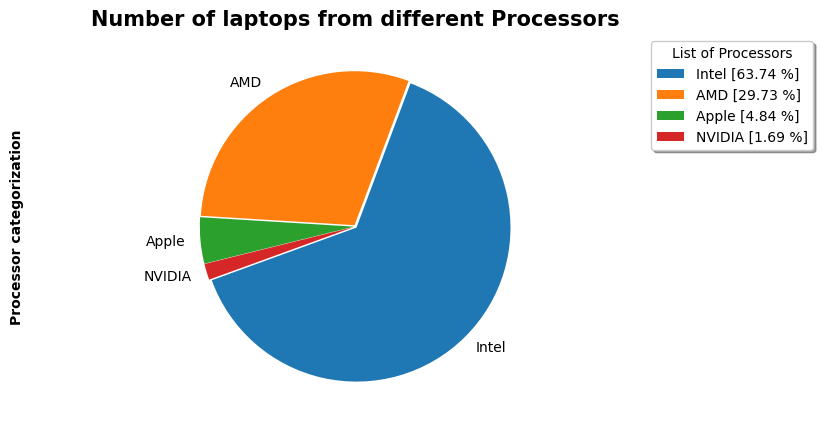

In [47]:
# Creating the plots for the share of laptops in data having different types of Processors.

myexplode = [0.01, 0.01, 0.01, 0.01]
laptops.Processor_Brands.value_counts(sort=False).plot(kind='pie', legend=True, explode = myexplode, startangle=200, figsize=(10,5))
plt.ylabel('Processor categorization', fontweight='bold', labelpad = 100)
plt.title('Number of laptops from different Processors', fontweight='bold', fontsize= 15)

percents = laptops.Processor_Brands.value_counts(sort=False) * 100 / laptops.Processor_Brands.value_counts(sort=False).sum()
plt.legend(bbox_to_anchor=(1.25, 1.0), loc='upper left', fancybox=True, shadow=True, title = 'List of Processors', labels=['%s [%1.2f %%]' % (l, s) for l, s in zip(laptops.Processor_Brands.unique(),percents)])

plt.show()

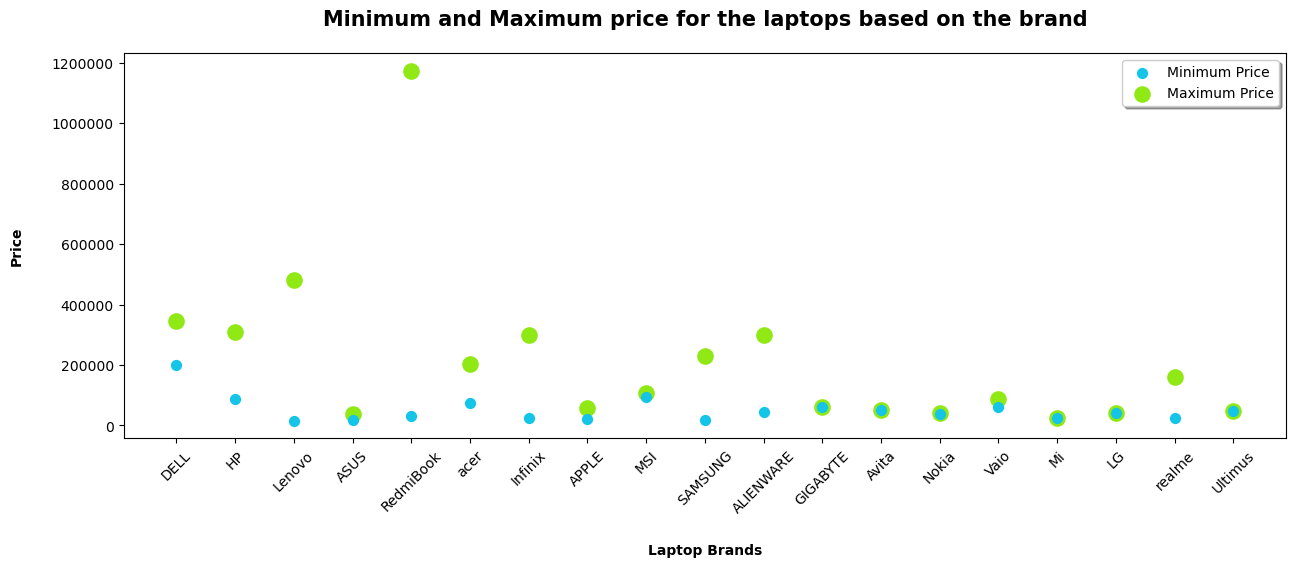

In [51]:
# Creatiing a box plot for each brand to show the minimum and maximum price. 

minimum = laptops.groupby('Laptop_Brands')['Price'].min()
maximum = laptops.groupby('Laptop_Brands')['Price'].max()

plt.figure(figsize = (15,5))
maxi = plt.scatter(laptops.Laptop_Brands.unique(), maximum, color = '#90e815', s = 120)
mini = plt.scatter(laptops.Laptop_Brands.unique(), minimum, color = '#15c5e8', s = 50)
plt.legend((mini, maxi), ('Minimum Price', 'Maximum Price'), loc='best', fontsize=10, fancybox=True, shadow=True)

plt.xlabel('Laptop Brands', fontweight='bold', labelpad = 20)
plt.xticks(rotation = 45)
plt.ylabel('Price', fontweight='bold', labelpad = 20)
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.title('Minimum and Maximum price for the laptops based on the brand', fontweight='bold', fontsize= 15, pad = 20)

plt.show()

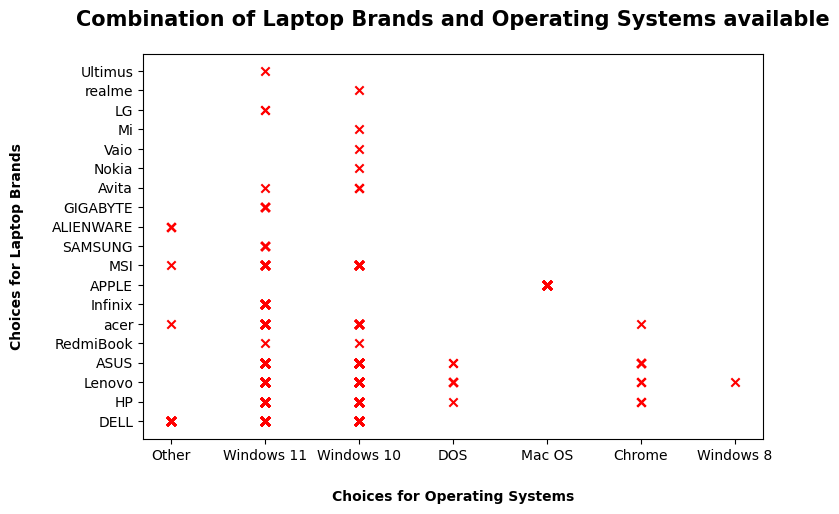

In [49]:
# Creating a scatter plot between the OS and Processor to know the choices of combinations, I guess. 

plt.figure(figsize = (8,5))
plt.scatter(laptops.OS, laptops.Laptop_Brands, color = 'red', marker = 'x')
plt.xlabel('Choices for Operating Systems', fontweight='bold', labelpad = 20)
plt.ylabel('Choices for Laptop Brands', fontweight='bold', labelpad = 20)
plt.title('Combination of Laptop Brands and Operating Systems available', fontweight='bold', fontsize= 15, pad = 20)
plt.show()

# WE ARE DONE!!
## Had fun. 